In [1]:
library("GA")
library("tidyverse")

Loading required package: foreach
Loading required package: iterators
Package 'GA' version 3.2.1
Type 'citation("GA")' for citing this R package in publications.

Attaching package: 'GA'

The following object is masked from 'package:utils':

    de

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.1
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x purrr::accumulate() masks foreach::accumulate()
x dplyr::filter()     masks stats::filter()
x dplyr::lag()        masks stats::lag()
x purrr::when()       masks foreach::when()


In [2]:
obj <- function(x) {
  x1=x[1]
  x2=x[2]
  return (x1**2+x2**2+25*(sin(x1)**2+sin(x2)**2))
}

-- Differential Evolution -------------- 

DE settings: 
Type                  =  real-valued 
Population size       =  20 
Number of generations =  100 
Elitism               =  0 
Stepsize              =  0.8 
Crossover probability =  0.5 
Mutation probability  =  0 
Search domain = 
             x1        x2
lower -6.283185 -6.283185
upper  6.283185  6.283185

DE results: 
Iterations             = 100 
Fitness function value = -6.795466e-17 
Solution = 
              x1           x2
[1,] -4.8412e-10 1.542488e-09

iter,x.x1,x.x2,minf.x.
<int>,<dbl>,<dbl>,<dbl>
100,-4.8412e-10,1.542488e-09,6.795466e-17


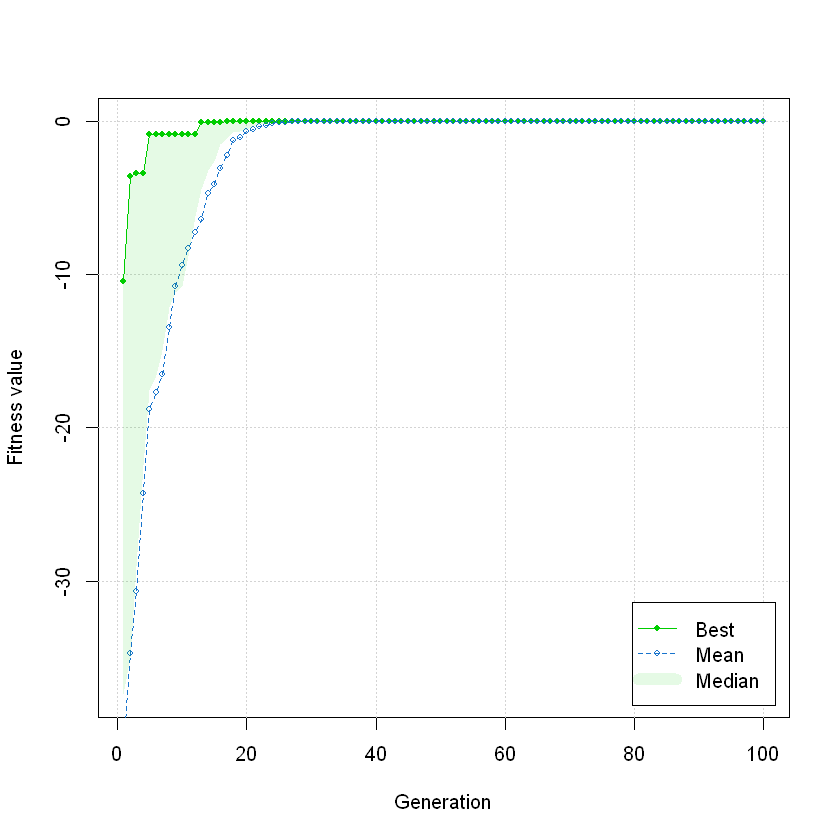

In [3]:
#part 1: One run GA in R with graph
ga_res = de(type = "real-valued",
  fitness=function(x) -obj(x), 
  lower  = c(-2*pi,-2*pi), 
  upper = c(2*pi,2*pi),
  keepBest = TRUE
)
summary(ga_res)
plot(ga_res)

GAsum<- data.frame("iter"=ga_res@iter,"x"=ga_res@solution, "minf(x)"=-ga_res@fitnessValue)
GAsum

iter,x1,x2,minf(x),CPU(time)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,-7.285393e-09,5.276677e-10,1.387240e-15,0.1675510
100,-1.252185e-08,1.612742e-08,1.083915e-14,0.1246989
100,1.978195e-09,-5.595567e-10,1.098854e-16,0.1176820
100,-6.386769e-09,-1.905140e-08,1.049741e-14,0.1086769
100,-3.185313e-10,1.827143e-09,8.943778e-17,0.1216731
100,-5.342178e-11,2.396237e-10,1.567109e-18,0.1217098
100,2.228563e-09,-4.875661e-09,7.472026e-16,0.1236331
100,-1.197811e-09,5.526350e-10,4.524407e-17,0.1226749
100,-4.889221e-09,-4.574199e-09,1.165522e-15,0.1057520


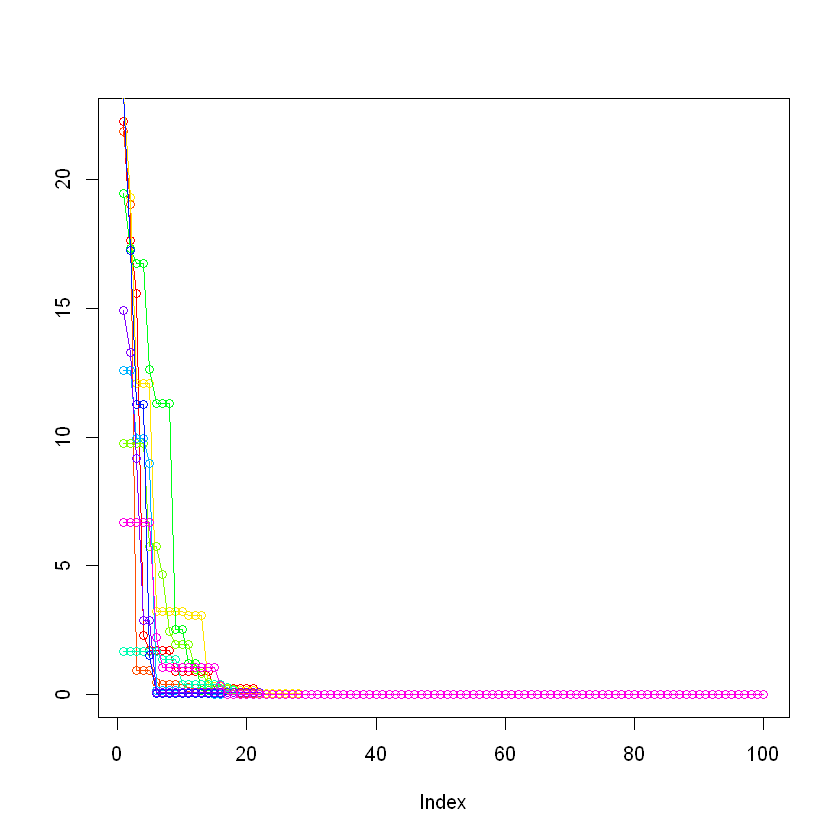

In [4]:
#part 2: 10 run table
df <- data.frame(matrix(ncol = 5, nrow = 0))
x1 <- c("iter", "x1","x2","minf(x)","CPU(time)")
val=list()
for (i in 1:10){
  start_time <- Sys.time()
  ga_res = de(type = "real-valued",
              fitness=function(x) -obj(x), 
              lower  = c(-2*pi,-2*pi), 
              upper = c(2*pi,2*pi),
              keepBest = TRUE)
  end_time <- Sys.time()
  tdif <- end_time - start_time
  df=rbind(df,c(ga_res@iter,ga_res@solution[1],ga_res@solution[2],-ga_res@fitnessValue,tdif))
  vec<-vector()
  for (j in 1:100){
    vec[j]=obj(ga_res@bestSol[[j]])
  }
  val[[i]]=vec
}
colnames(df) <- x1
name=c(1:10)
valdf <- as.data.frame(val)
colnames(valdf)<-name
df
colors<-rainbow(20)
plot(valdf[,10],type = "o",col=colors[1],ylab='')
for(i in 1:9){
  lines(valdf[,i], type = "o", col =colors[2*i])
}
